<a href="https://colab.research.google.com/github/musical-shyam/CS-536-ML-Projects/blob/main/Assignment-5/Polynomial_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS 536 - Intro to ML Assignment 5**

## **Importing the Required Libraries**

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from numpy.random import randn
import matplotlib.pyplot as plt

## **Generating the Required Dataset**

### Defining the Functions

In [ ]:
# Defining the Linear Function
def linear_func(x):
  return 3*x +1

# Defining the Quadratic Function
def quadratic_func(x):
  return 5*x*x + 3*x + 1

# Defining the Cubic Function
def cubic_func(x):
  return 7*x*x*x + 5*x*x + 3*x + 1

### Generating the points in the Function

In [ ]:
def data_generator(func, batch_s = 256):
  'This Function generates the data of batch size = batch_s'
  data = []
  x = 20 * randn(batch_s) # random inputs
  for i in range(batch_s):
    y = func(x[i])
    data.append([x[i], y]) # dataset
  return torch.FloatTensor(data)

linear_data = data_generator(linear_func)
quadratic_data = data_generator(quadratic_func)
cubic_data = data_generator(cubic_func)


### Plotting the Initial Real data samples

#### Linear Equation

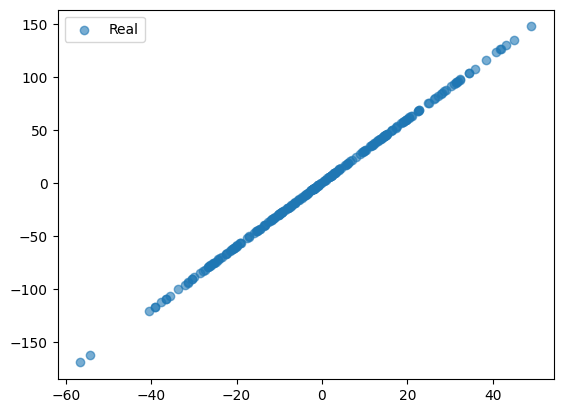

In [ ]:
plt.scatter(linear_data[:,0].numpy(), linear_data[:, 1].numpy(), label='Real', alpha=0.6)
plt.legend()
plt.show()

#### Quadratic Equation

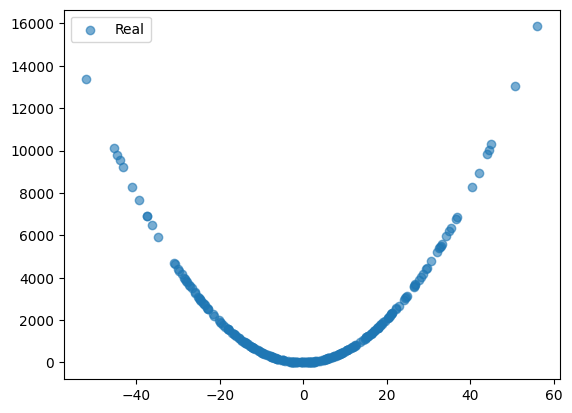

In [ ]:
plt.scatter(quadratic_data[:,0].numpy(), quadratic_data[:,1].numpy(), label='Real', alpha=0.6)
plt.legend()
plt.show()

#### Cubic Equation

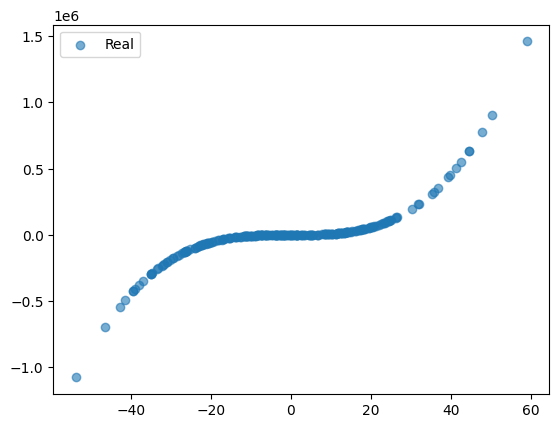

In [ ]:
plt.scatter(cubic_data[:,0].numpy(), cubic_data[:,1].numpy(), label='Real', alpha=0.6)
plt.legend()
plt.show()

## **Training the GAN Model**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


### **Setting Up Hyperparameters**

#### Linear Equation

In [ ]:
batch_s = 256
linear_lr = 0.001
linear_epochs = 40000

#### Quadratic Equation

In [ ]:
quad_lr = 0.0001
quad_epochs = 40000

#### Cubic Equation

In [ ]:
cubic_lr = 0.0001
cubic_epochs = 40000

### **Defining the GAN architectures**

#### Linear Equation

In [ ]:
class Linear_Generator(nn.Module):
  def __init__(self):
    super(Linear_Generator, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(1, 256),
        nn.LeakyReLU(0.1),
        nn.Linear(256, 1)
    )

  def forward(self, x):
    output = self.model(x)
    return output

class Linear_Discriminator(nn.Module):
  def __init__(self):
    super(Linear_Discriminator, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(1, 128),
        nn.LeakyReLU(0.1),
        nn.Linear(128,1),
        nn.Sigmoid()
    )
  def forward(self, x):
    output = self.model(x)
    return output

#### Quadratic Equation

In [ ]:
class Quadratic_Generator(nn.Module):
  def __init__(self):
    super(Quadratic_Generator, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(1, 128),
        nn.LeakyReLU(),
        nn.Linear(128, 32),
        nn.LeakyReLU(),
        nn.Linear(32, 1)
    )

  def forward(self, x):
    output = self.model(x)
    return output

class Quadratic_Discriminator(nn.Module):
  def __init__(self):
    super(Quadratic_Discriminator, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(1, 256),
        nn.LeakyReLU(),
        nn.Linear(256, 64),
        nn.LeakyReLU(),
        nn.Linear(64,1),
        nn.Sigmoid()
    )
  def forward(self, x):
    output = self.model(x)
    return output

#### Cubic Equation

In [ ]:
class Cubic_Generator(nn.Module):
  def __init__(self):
    super(Cubic_Generator, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(1, 256),
        nn.LeakyReLU(),
        nn.Linear(256, 128),
        nn.LeakyReLU(),
        nn.Linear(128, 64),
        nn.LeakyReLU(),
        nn.Linear(64, 1)
    )

  def forward(self, x):
    output = self.model(x)
    return output

class Cubic_Discriminator(nn.Module):
  def __init__(self):
    super(Cubic_Discriminator, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(1, 512),
        nn.LeakyReLU(),
        nn.Linear(512, 256),
        nn.LeakyReLU(),
        nn.Linear(256 ,64),
        nn.LeakyReLU(),
        nn.Linear(64, 1),
        nn.Sigmoid()
    )
  def forward(self, x):
    output = self.model(x)
    return output

### **Definining the train model function**

In [ ]:
def discriminator_loss(real_outputs, fake_outputs):
    real_loss = -torch.mean(torch.log(real_outputs + 1e-8))  # Adding small value to avoid log(0)
    fake_loss = -torch.mean(torch.log(1 - fake_outputs + 1e-8))
    return real_loss + fake_loss

# Generator loss function
def generator_loss(fake_outputs):
    return -torch.mean(torch.log(fake_outputs + 1e-8))

In [ ]:
def train_models(data, function_name):

  if function_name == 'linear':
    generator = Linear_Generator().to(device)
    discriminator = Linear_Discriminator().to(device)
    lr = linear_lr
    epochs = linear_epochs
  elif function_name == 'quadratic':
    generator = Quadratic_Generator().to(device)
    discriminator = Quadratic_Discriminator().to(device)
    lr = quad_lr
    epochs = quad_epochs
  elif function_name == 'cubic':
    generator = Cubic_Generator().to(device)
    discriminator = Cubic_Discriminator().to(device)
    lr = cubic_lr
    epochs = cubic_epochs

  d_optimizer = optim.Adam(discriminator.parameters(), lr = lr)
  g_optimizer = optim.Adam(generator.parameters(), lr = lr)

  for epoch in range(1, epochs+1):
    real_data = data[:, 1].unsqueeze(1)
    real_labels = torch.ones(batch_s, 1)

    noise = torch.randn(batch_s, 1).to(device)
    fake_data = generator(noise)
    fake_labels = torch.zeros(batch_s, 1)

    d_optimizer.zero_grad()
    real_outputs = discriminator(real_data)
    fake_outputs = discriminator(fake_data.detach())
    d_loss = discriminator_loss(real_outputs, fake_outputs)
    d_loss.backward()
    d_optimizer.step()

    g_optimizer.zero_grad()
    fake_data = discriminator(fake_data)
    g_loss = generator_loss(fake_data)
    g_loss.backward()
    g_optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch [{epoch}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

  return generator

### **Training 3 different models**

In [ ]:
# Training Linear Model
print('Training Linear Model')
linear_generator = train_models(linear_data,'linear')

Training Linear Model
Epoch [1000/40000] | D Loss: 1.3107 | G Loss: 0.8508
Epoch [2000/40000] | D Loss: 1.3885 | G Loss: 0.7202
Epoch [3000/40000] | D Loss: 1.3822 | G Loss: 0.6760
Epoch [4000/40000] | D Loss: 1.4086 | G Loss: 0.7024
Epoch [5000/40000] | D Loss: 1.3977 | G Loss: 0.6744
Epoch [6000/40000] | D Loss: 1.3875 | G Loss: 0.7784
Epoch [7000/40000] | D Loss: 1.3905 | G Loss: 0.7035
Epoch [8000/40000] | D Loss: 1.3857 | G Loss: 0.7275
Epoch [9000/40000] | D Loss: 1.3875 | G Loss: 0.7407
Epoch [10000/40000] | D Loss: 1.3937 | G Loss: 0.6567
Epoch [11000/40000] | D Loss: 1.3786 | G Loss: 0.6941
Epoch [12000/40000] | D Loss: 1.4274 | G Loss: 0.6933
Epoch [13000/40000] | D Loss: 1.3855 | G Loss: 0.6735
Epoch [14000/40000] | D Loss: 1.3837 | G Loss: 0.7053
Epoch [15000/40000] | D Loss: 1.3819 | G Loss: 0.7240
Epoch [16000/40000] | D Loss: 1.3892 | G Loss: 0.7159
Epoch [17000/40000] | D Loss: 1.3823 | G Loss: 0.6943
Epoch [18000/40000] | D Loss: 1.3796 | G Loss: 0.7174
Epoch [19000/40

In [ ]:
# Training Quadratic Model
print('Training Quadratic Model')
quadratic_generator = train_models(quadratic_data, 'quadratic')

Training Quadratic Model
Epoch [1000/40000] | D Loss: 0.4337 | G Loss: 2.2221
Epoch [2000/40000] | D Loss: 0.5392 | G Loss: 1.9178
Epoch [3000/40000] | D Loss: 0.6215 | G Loss: 1.6699
Epoch [4000/40000] | D Loss: 0.7326 | G Loss: 1.8423
Epoch [5000/40000] | D Loss: 0.8182 | G Loss: 1.2902
Epoch [6000/40000] | D Loss: 1.0361 | G Loss: 1.5145
Epoch [7000/40000] | D Loss: 1.2320 | G Loss: 2.0508
Epoch [8000/40000] | D Loss: 9.1523 | G Loss: 2.3136
Epoch [9000/40000] | D Loss: 12.6088 | G Loss: 0.1398
Epoch [10000/40000] | D Loss: 1.2878 | G Loss: 1.4434
Epoch [11000/40000] | D Loss: 1.2953 | G Loss: 1.4862
Epoch [12000/40000] | D Loss: 11.5187 | G Loss: 0.2769
Epoch [13000/40000] | D Loss: 1.3517 | G Loss: 1.3336
Epoch [14000/40000] | D Loss: 8.8262 | G Loss: 0.4119
Epoch [15000/40000] | D Loss: 13.6583 | G Loss: 0.1808
Epoch [16000/40000] | D Loss: 1.4940 | G Loss: 1.6221
Epoch [17000/40000] | D Loss: 12.8625 | G Loss: 0.2321
Epoch [18000/40000] | D Loss: 1.4527 | G Loss: 2.5241
Epoch [1

In [ ]:
# Training Cubic Model
print('Training Cubic Model')
cubic_generator = train_models(cubic_data, 'cubic')

Training Cubic Model
Epoch [1000/40000] | D Loss: 0.4233 | G Loss: 1.6542
Epoch [2000/40000] | D Loss: 7.7850 | G Loss: 7.3177
Epoch [3000/40000] | D Loss: 17.9422 | G Loss: 0.0010
Epoch [4000/40000] | D Loss: 0.5424 | G Loss: 1.4407
Epoch [5000/40000] | D Loss: 1.4467 | G Loss: 1.3108
Epoch [6000/40000] | D Loss: 8.3620 | G Loss: 0.9796
Epoch [7000/40000] | D Loss: 0.5327 | G Loss: 1.7564
Epoch [8000/40000] | D Loss: 0.5899 | G Loss: 1.7632
Epoch [9000/40000] | D Loss: 4.2104 | G Loss: 0.3893
Epoch [10000/40000] | D Loss: 0.5261 | G Loss: 1.7683
Epoch [11000/40000] | D Loss: 9.7470 | G Loss: 0.7224
Epoch [12000/40000] | D Loss: 14.9103 | G Loss: 0.2440
Epoch [13000/40000] | D Loss: 18.4228 | G Loss: -0.0000
Epoch [14000/40000] | D Loss: 18.4215 | G Loss: -0.0000
Epoch [15000/40000] | D Loss: 17.0692 | G Loss: 14.0316
Epoch [16000/40000] | D Loss: 17.6067 | G Loss: 0.0225
Epoch [17000/40000] | D Loss: 0.5772 | G Loss: 2.1114
Epoch [18000/40000] | D Loss: 0.4534 | G Loss: 2.1871
Epoch [

### Generating the Real and Fake Data

In [ ]:
real_data_linear = data_generator(linear_func, batch_s=5000).numpy()
linear_generator_data = linear_generator(torch.FloatTensor(real_data_linear)[:,0].unsqueeze(1)).detach().numpy().flatten()

In [ ]:
real_data_quadratic = data_generator(quadratic_func, batch_s=5000).numpy()
quadratic_generator_data = quadratic_generator(torch.FloatTensor(real_data_quadratic)[:,0].unsqueeze(1)).detach().numpy().flatten()

In [ ]:
real_data_cubic = data_generator(cubic_func, batch_s=5000).numpy()
cubic_generator_data = cubic_generator(torch.FloatTensor(real_data_cubic)[:,0].unsqueeze(1)).detach().numpy().flatten()

### Plot the Real vs. Fake Graph

#### Linear Equation

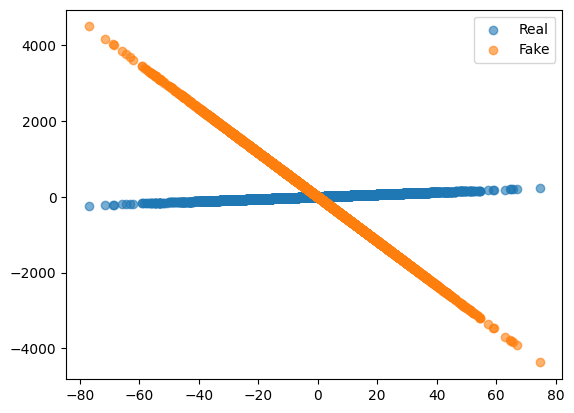

In [ ]:
plt.scatter(real_data_linear[:,0], real_data_linear[:,1], label='Real', alpha=0.6)
plt.scatter(real_data_linear[:, 0], linear_generator_data, label='Fake', alpha=0.6)

plt.legend()
plt.show()

#### Quadratic Equation

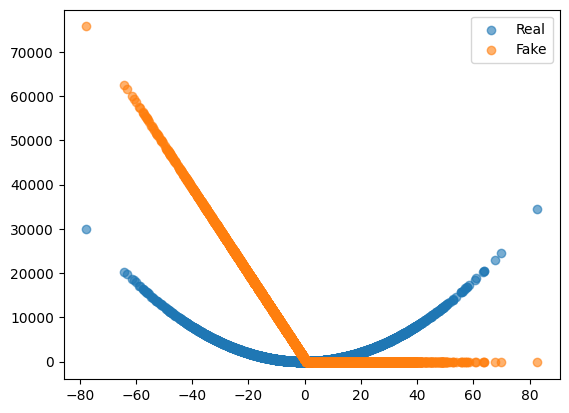

In [ ]:
plt.scatter(real_data_quadratic[:,0], real_data_quadratic[:,1], label='Real', alpha=0.6)
plt.scatter(real_data_quadratic[:, 0], quadratic_generator_data, label='Fake', alpha=0.6)

plt.legend()
plt.show()

#### Cubic Equation

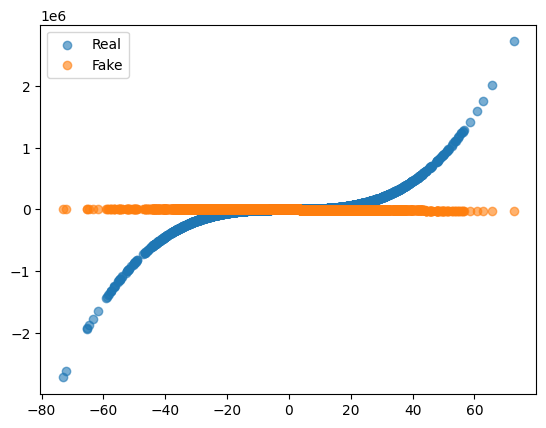

In [ ]:
plt.scatter(real_data_cubic[:,0], real_data_cubic[:,1], label='Real', alpha=0.6)
plt.scatter(real_data_cubic[:, 0], cubic_generator_data, label='Fake', alpha=0.6)

plt.legend()
plt.show()